In [1]:
##Import all the necessary package 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import lab data 
data=pd.read_csv("lab_results.csv")

In [3]:
data.head()

,pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeF,Age,Outcome
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [4]:
## Checking the shape of Data
data.shape

(768, 9)

In [5]:
# Checking for missing data
data.isnull().sum()

pregnancies          0
Glucose              0
BloodPressure        0
SkinThickness        0
Insulin              0
BMI                  0
DiabetesPedigreeF    0
Age                  0
Outcome              0
dtype: int64

In [6]:
## Checking the summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.0,1.000000,3.000000,6.000000,17.0
Glucose,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,1.813907,44.520947,0.0,0.000000,0.232323,0.323232,1234.0
Insulin,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeF,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Age,768.0,37.744792,93.171289,21.0,24.000000,29.000000,41.000000,2300.0
Outcome,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


In [7]:
## Checking the summary of the dataset
data.dtypes

pregnancies            int64
Glucose              float64
BloodPressure        float64
SkinThickness        float64
Insulin              float64
BMI                  float64
DiabetesPedigreeF    float64
Age                    int64
Outcome                int64
dtype: object

### **Outlier Detection and Treatment**


In [8]:
import seaborn as sns

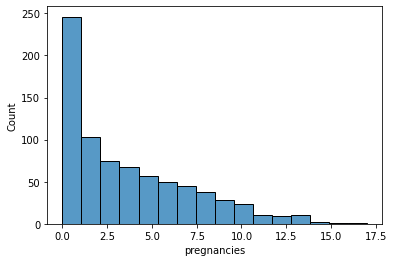

In [9]:
sns.histplot(data["pregnancies"])

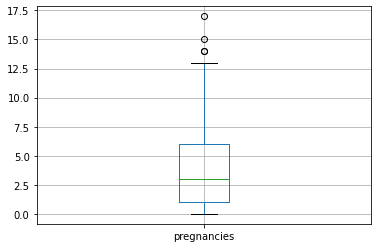

In [10]:
data.boxplot(column="pregnancies")

In [11]:
## As Data is skewed  so I will use following treatment
IQR=data.pregnancies.quantile(0.75)-data.pregnancies.quantile(0.25)
print(IQR)

5.0


In [12]:
lower_boundary=data.pregnancies.quantile(.25)-(IQR*3.0)
upper_boundary=data.pregnancies.quantile(.75)+(IQR*3.0)
print(lower_boundary,upper_boundary)

-14.0 21.0


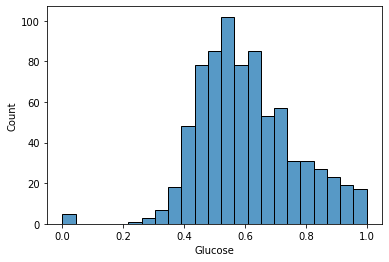

In [13]:
sns.histplot(data["Glucose"])

In [14]:
##### Assuming Glucose follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=data['Glucose'].mean() + 3* data['Glucose'].std()
lower_boundary=data['Glucose'].mean() - 3* data['Glucose'].std()
print(lower_boundary,uppper_boundary)

0.12551093804642477 1.0895094765317


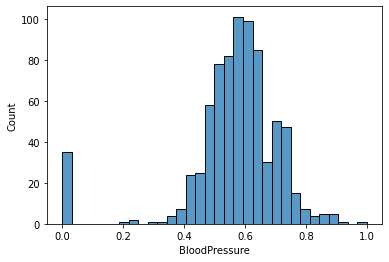

In [15]:
sns.histplot(data["BloodPressure"])

In [16]:
##### Assuming Blood Pressure follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary=data['BloodPressure'].mean() + 3* data['BloodPressure'].std()
lower_boundary=data['BloodPressure'].mean() - 3* data['BloodPressure'].std()
print(lower_boundary,uppper_boundary)

0.09047579705124442 1.042400739828964


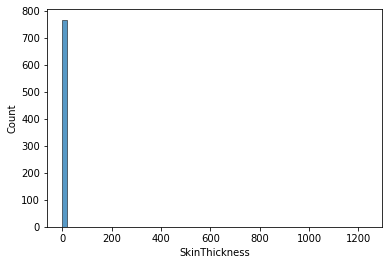

In [17]:
sns.histplot(data["SkinThickness"],bins=60)

In [18]:
IQR_ST=data.SkinThickness.quantile(0.75)-data.SkinThickness.quantile(0.25)
print(IQR_ST)

0.323232323


In [19]:
lower_boundary=data.SkinThickness.quantile(.25)-(IQR_ST*1.5)
upper_boundary=data.SkinThickness.quantile(.75)+(IQR_ST*1.5)
print(lower_boundary,upper_boundary)

-0.48484848449999995 0.8080808074999999


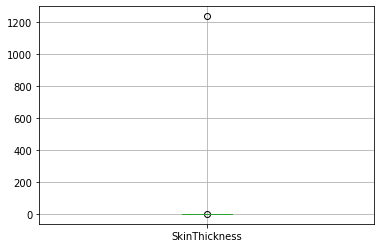

In [20]:
data.boxplot(column="SkinThickness")

In [21]:
data[data["SkinThickness"]>=.80].count()

pregnancies          2
Glucose              2
BloodPressure        2
SkinThickness        2
Insulin              2
BMI                  2
DiabetesPedigreeF    2
Age                  2
Outcome              2
dtype: int64

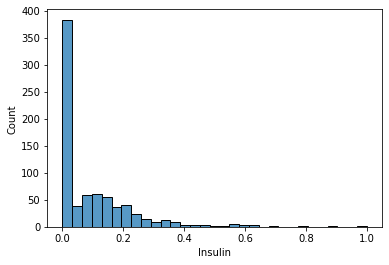

In [22]:
sns.histplot(data["Insulin"])

In [23]:
## As Data is skewed  so I will use following treatment
IQR_Ins=data.Insulin.quantile(0.75)-data.Insulin.quantile(0.25)
print(IQR_Ins)

0.15041371125


In [24]:
lower_boundary=data.Insulin.quantile(.25)-(IQR_Ins*3.0)
upper_boundary=data.Insulin.quantile(.75)+(IQR_Ins*3.0)
print(lower_boundary,upper_boundary)

-0.45124113374999997 0.601654845


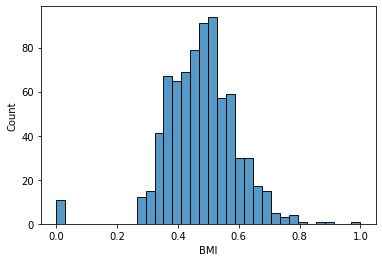

In [25]:
sns.histplot(data["BMI"])

In [26]:
##### Assuming  follows BMI A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary=data['BMI'].mean() + 3* data['BMI'].std()
lower_boundary=data['BMI'].mean() - 3* data['BMI'].std()
print(lower_boundary,uppper_boundary)

0.12429354941785797 0.8292855302878707


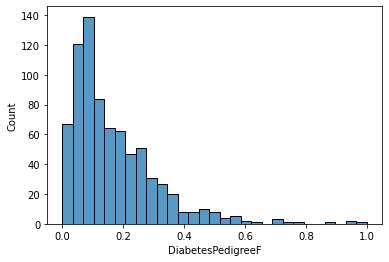

In [27]:
sns.histplot(data["DiabetesPedigreeF"])

In [28]:
## As Data is skewed  so I will use following treatment
IQR=data.DiabetesPedigreeF.quantile(0.75)-data.DiabetesPedigreeF.quantile(0.25)
print(IQR)

0.16332194674999997


In [29]:
lower_boundary=data.DiabetesPedigreeF.quantile(.25)-(IQR*3.0)
upper_boundary=data.DiabetesPedigreeF.quantile(.75)+(IQR*3.0)
print(lower_boundary,upper_boundary)

-0.41919299649999986 0.7240606307499999


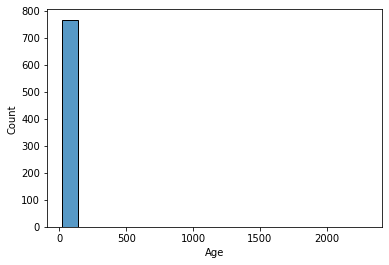

In [30]:
sns.histplot(data["Age"],bins=20)

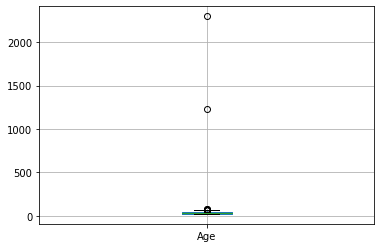

In [31]:
data.boxplot(column="Age")

In [32]:
# IQR Treatment for Age
IQR_Age=data.Age.quantile(.75)-data.Age.quantile(.25)
print(IQR_Age)

17.0


In [33]:
lower_boundary=data.Age.quantile(.25)-(IQR_Age*3.0)
upper_boundary=data.Age.quantile(.75)+(IQR_Age*3.0)
print(lower_boundary,upper_boundary)

-27.0 92.0


In [34]:
data[data["Age"]>=92].count()

pregnancies          2
Glucose              2
BloodPressure        2
SkinThickness        2
Insulin              2
BMI                  2
DiabetesPedigreeF    2
Age                  2
Outcome              2
dtype: int64

In [35]:
df=data.copy()

In [36]:
df.columns

Index(['pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeF', 'Age', 'Outcome'],
      dtype='object')

### Removing Outlier

In [37]:
df.loc[df['pregnancies']>=21,"pregnancies"]=21

In [38]:
df.loc[df['Glucose']>=1,"Glucose"]=1

In [39]:
df.loc[df['SkinThickness']>=.80,'SkinThickness']=.80

In [40]:
df.loc[df['Insulin']>=.60,'Insulin']=.60

In [41]:
df.loc[df['BMI']>=.83,'BMI']=.83

In [42]:
df.loc[df['BMI']<=.12,'BMI']=.12

In [43]:
df.loc[df['DiabetesPedigreeF']>=.72,'DiabetesPedigreeF']=.72

In [44]:
df.loc[df['Age']>=92,'Age']=92

###**After Treating the Outlier , The resulting table **

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.00,1.000000,3.000000,6.000000,17.00
Glucose,768.0,0.607510,0.160666,0.00,0.497487,0.587940,0.704774,1.00
BloodPressure,768.0,0.566438,0.158654,0.00,0.508197,0.590164,0.655738,1.00
SkinThickness,768.0,0.207918,0.161430,0.00,0.000000,0.232323,0.323232,0.80
Insulin,768.0,0.092758,0.128726,0.00,0.000000,0.036052,0.150414,0.60
BMI,768.0,0.478184,0.109989,0.12,0.406855,0.476900,0.545455,0.83
DiabetesPedigreeF,768.0,0.166922,0.135435,0.00,0.070773,0.125747,0.234095,0.72
Age,768.0,33.389323,12.120247,21.00,24.000000,29.000000,41.000000,92.00
Outcome,768.0,0.348958,0.476951,0.00,0.000000,0.000000,1.000000,1.00


In [46]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [47]:
#Checking percentage of different values n the columns
(data['Outcome'].value_counts()/data["Outcome"].count())*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

###Model without balanceing Data

In [48]:
## Drop the label data
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [49]:
X.shape , y.shape


((768, 8), (768,))

In [50]:
X.columns

Index(['pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeF', 'Age'],
      dtype='object')

In [51]:
## Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [52]:
#fitting the training data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
# fitting X_train and X_test data
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [54]:
## Implementing the model 
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=300)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
## Checking the model Performances
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
y_pred=mlp.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy score: \t {}".format(accuracy))
print("Classification score \n {}".format(classification_report(y_test,y_pred)))
print("ROC score: \t {}".format(roc_auc_score(y_test,y_pred)))
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test,y_pred)))

Accuracy score: 	 0.7229437229437229
Classification score 
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

ROC score: 	 0.6940397350993378
Confusion Matrix: 
 [[119  32]
 [ 32  48]]


### Implement K-fold Cross Validation to see the model performances

In [56]:
##Checking the model performances using K-fold 
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=mlp, X=X_train,y=y_train,cv=10)
print("Accuracy of the model:\t {:.2f} %".format(accuracy.mean()*100))
print("Standard deviation of the model:\t {:.2f}%".format(accuracy.std()*100))

Accuracy of the model:	 74.29 %
Standard deviation of the model:	 5.66%


###Applying GridSerachCV to get the best modell and parameters

In [57]:
#Implementing Gird SearchCV
from sklearn.model_selection import GridSearchCV
parameters={'hidden_layer_sizes':[(10,),(10,),(10,)],
            'activation':['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'learning_rate':['constant', 'invscaling', 'adaptive'],
            'alpha':[0.0001,0.005]   
}

grid_search=GridSearchCV(estimator=mlp,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(10, 10, 10),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=300, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tan

In [58]:
accuracy=grid_search.best_score_
print(accuracy)

0.7894479385045423


In [59]:
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.005,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'solver': 'adam'}

### Reimplementing the model with the best parameters

In [72]:
#Implementing the model
mlp1=MLPClassifier(activation= 'tanh',alpha=0.005, hidden_layer_sizes=(10,),learning_rate='constant',solver= 'adam',max_iter=300)
mlp1.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [73]:
## Checking the model Performances
y_pred=mlp1.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy score: \t {:.2f} %".format(accuracy*100))
print("Classification Report \n {}".format(classification_report(y_test,y_pred)))
print("ROC score: \t {:.2f} %".format(roc_auc_score(y_test,y_pred)*100))
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test,y_pred)))

Accuracy score: 	 73.16 %
Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.62      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

ROC score: 	 69.77 %
Confusion Matrix: 
 [[122  29]
 [ 33  47]]


### Model with balanceing Data using Over Sampling(for the purpose of checking)

In [62]:
## Performing oversampling and importing the file
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [63]:
## Performing oversampling
rs=RandomOverSampler(.75)
X_train_RS, y_train_RS=rs.fit_sample(X_train,y_train)
print("class before fit{}".format(Counter(y_train)))
print("class after fit{}".format(Counter(y_train_RS)))

class before fitCounter({0: 349, 1: 188})
class after fitCounter({0: 349, 1: 261})


In [64]:
# Implementing the model
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10,10),max_iter=300)
mlp.fit(X_train_RS,y_train_RS)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [65]:
## Checking the model Performances
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,confusion_matrix
y_pred=mlp.predict(X_test)
print("Accuracy score: \t {}".format(accuracy_score(y_test,y_pred)))
print("Classification score \n {}".format(classification_report(y_test,y_pred)))
print("ROC score: \t {}".format(roc_auc_score(y_test,y_pred)))
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test,y_pred)))

Accuracy score: 	 0.7142857142857143
Classification score 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       151
           1       0.58      0.66      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.71      0.72       231

ROC score: 	 0.7021109271523179
Confusion Matrix: 
 [[112  39]
 [ 27  53]]


### Implement K-fold Cross Validation to see the model performances

In [66]:
## Checking the model performance  using the K-fold
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(estimator=mlp, X=X_train_RS,y=y_train_RS,cv=10)
print("Accuracy of the model:\t {:.2f} %".format(accuracy.mean()*100))
print("Standard deviation of the model:\t {:.2f}%".format(accuracy.std()*100))

Accuracy of the model:	 75.57 %
Standard deviation of the model:	 4.24%


### Implementing GridSearchCV to get the best parameters

In [67]:
from sklearn.model_selection import GridSearchCV
parameters={'hidden_layer_sizes':[(10,),(10,),(10,)],
            'activation':['identity', 'logistic', 'tanh', 'relu'],
            'solver': ['lbfgs', 'sgd', 'adam'],
            'learning_rate':['constant', 'invscaling', 'adaptive'],
            'alpha':[0.0001,0.005]   
}

grid_search=GridSearchCV(estimator=mlp,param_grid=parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search.fit(X_train_RS,y_train_RS)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=(10, 10, 10),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=300, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tan

In [68]:
## Getting the best accuracy rate
accuracy=grid_search.best_score_
print(accuracy)

0.7918032786885245


In [69]:
## Getting the best Parameter
grid_search.best_params_

{'activation': 'tanh',
 'alpha': 0.005,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'invscaling',
 'solver': 'lbfgs'}

###Reimplementing the model with the best parameters for banlance dataset

In [83]:
#Implementing the model
mlp_RS=MLPClassifier(activation= 'tanh',alpha=0.005, hidden_layer_sizes=(10,),learning_rate='invscaling',solver= 'lbfgs',max_iter=300)
mlp_RS.fit(X_train_RS,y_train_RS)

MLPClassifier(activation='tanh', alpha=0.005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [84]:

## Checking the model Performances
y_pred=mlp_RS.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy score: \t {:.2f} %".format(accuracy*100))
print("Classification Report \n {}".format(classification_report(y_test,y_pred)))
print("ROC score: \t {:.2f} %".format(roc_auc_score(y_test,y_pred)*100))
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test,y_pred)))

Accuracy score: 	 74.46 %
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       151
           1       0.62      0.68      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

ROC score: 	 72.82 %
Confusion Matrix: 
 [[118  33]
 [ 26  54]]
